In [1]:
# Libraries
import gpflow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods
)

## Data Generation

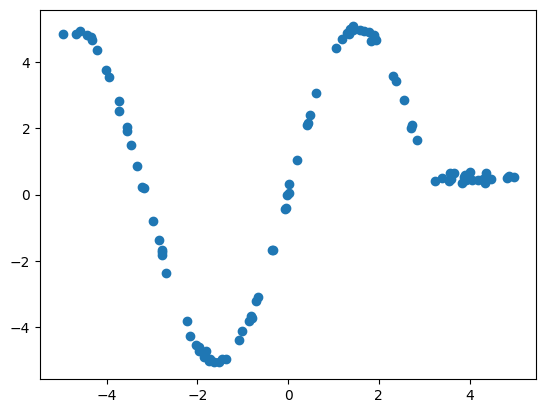

In [2]:
# Simulate some data
np.random.seed(9102)
N = 100
X = np.random.uniform(low=-5, high=5, size=(N, 1))

# Prediction points for later
num_pred_points = 1000
xnew = np.linspace(-5, 5, num_pred_points).reshape(-1, 1)

# Outcome is sin with unit specific offset
# Y = (np.sin(X[:, 1] + X[:, 0]) + X[:, 0] + np.random.normal(scale=.1, size=N)).reshape(-1, 1)
Y = 5 * np.sin(X)
Y[X >= 3] = 0.5
Y += np.random.normal(scale=.1, size=(N, 1))

# Plot the function
plt.scatter(X, Y)
plt.show()

In [3]:
# Make base class
gp = model_classes.BaseGP(
    X=X,
    Y=Y,
    kernel=gpflow.kernels.SquaredExponential(),
    verbose=True
)
print(gpflow.utilities.print_summary(gp))

╒════════════════════════════╤═══════════╤══════════════════╤═════════╤═════════════╤═══════════════╤═════════╤══════════════════╕
│ name                       │ class     │ transform        │ prior   │ trainable   │ shape         │ dtype   │ value            │
╞════════════════════════════╪═══════════╪══════════════════╪═════════╪═════════════╪═══════════════╪═════════╪══════════════════╡
│ BaseGP.mean_function.c     │ Parameter │ Identity         │         │ True        │ ()            │ float64 │ 0.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.variance     │ Parameter │ Softplus         │         │ True        │ ()            │ float64 │ 1.0              │
├────────────────────────────┼───────────┼──────────────────┼─────────┼─────────────┼───────────────┼─────────┼──────────────────┤
│ BaseGP.kernel.lengthscales │ Parameter │ Softplus         │         │ True       

In [4]:
# Randomize initial values and then optimize hyperparameters
gp.randomize_params(random_seed=9102)
gp.optimize_params(data=(X, Y))
gp

Round 0 training loss: 333.59571421313836
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.1>
New gamma rate: 0.1
Round 500 training loss: -17.149254851501567
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.096>
New gamma rate: 0.1
Round 1000 training loss: -21.186717667873154
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.09216>
New gamma rate: 0.1
Round 1500 training loss: -23.837063645560676
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.0884736>
New gamma rate: 0.1
Round 2000 training loss: -25.76014147230964
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.08493466>
New gamma rate: 0.1
Round 2500 training loss: -27.28287977103571
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.08153727>
New gamma rate: 0.1
Round 3000 training loss: -28.560046181670685

name,class,transform,prior,trainable,shape,dtype,value
BaseGP.mean_function.c,Parameter,Identity,,True,(),float64,0.31550681122709
BaseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.32876
BaseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.9422410454119596
BaseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.008981814033937028
BaseGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
BaseGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[3.05130000e+00...
BaseGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[3.33889719e-02, 0.00000000e+00, 0.00000000e+00..."


In [5]:
# Show that we can do this process a number of times to search parameter space easier
gp.random_restart_optimize(data=(X,Y), num_restart=3)

Random restart 1
Round 0 training loss: 648.1168654716109
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.1>
New gamma rate: 0.1
Round 500 training loss: -36.55565286216698
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.096>
New gamma rate: 0.1
Round 1000 training loss: -37.14319592298776
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.09216>
New gamma rate: 0.1


Round 1500 training loss: -37.48070792223902
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.0884736>
New gamma rate: 0.1
Optimization converged - stopping early (round 1500)
Found better parameters!
Random restart 2
Round 0 training loss: 369.3311620272008
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.1>
New gamma rate: 0.1
Round 500 training loss: -38.10554149870119
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.096>
New gamma rate: 0.1


Optimization converged - stopping early (round 700)
Random restart 3
Round 0 training loss: 258.31661840710944
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.1>
New gamma rate: 0.1
Reached invalid step in optimization, returning previous step.


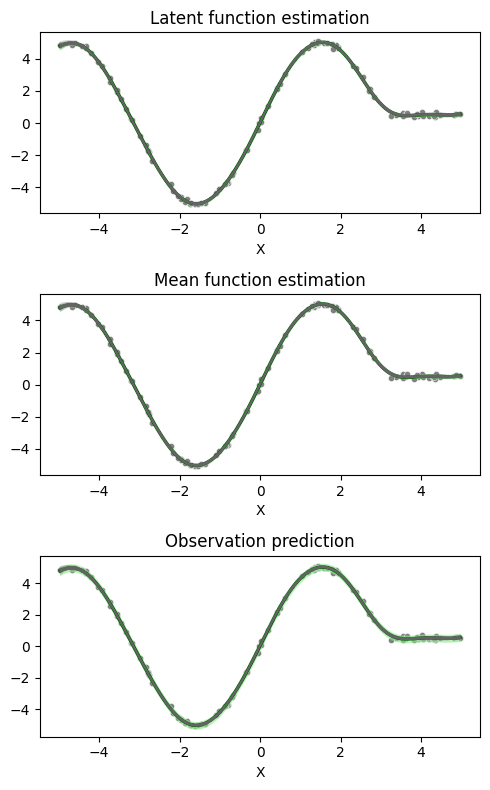

In [6]:
# Now plot the resulting model predictions 
# (first two are the same given the gaussian likelihood)
figs, axs = plt.subplots(3, 1, figsize=(5, 8))
gp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
gp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
gp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='obs', ax=axs[2])
axs[2].set_title('Observation prediction')
figs.tight_layout()
plt.show()

In [7]:
# Also have built-in methods to calculate values of interest
gp.get_variance_explained(data=(X, Y))
# This produces a list for each component (log Bayes factor) + left over residual (calculated as 1 - deviance explained)
print(f"Variance explained for each component: {gp.variance_explained}")
print(f"BIC: {gp.calc_metric(data=(X, Y))}")

Variance explained for each component: ListWrapper([50.0, 0.001])
BIC: -66.96141584447804


## Nonnormal data

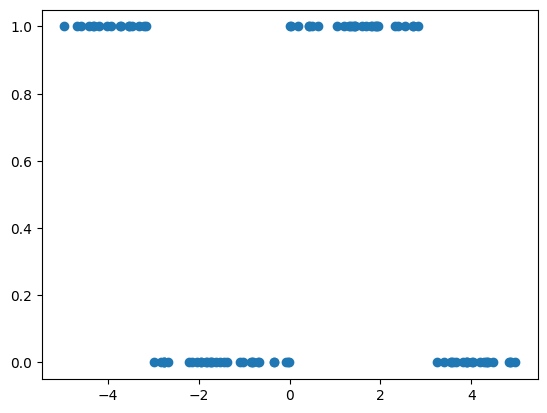

In [8]:
np.random.seed(9102)
import scipy
Y_binomial = np.random.binomial(n=1, p=scipy.special.expit(Y))
plt.scatter(X, Y_binomial)
plt.show()

In [9]:
logistic_gp = model_classes.VarGP(
    X=X,
    Y=Y_binomial,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='bernoulli',
    verbose=True # Can set this option to see what is going on (default: False)
)

In [10]:
# logistic_gp.randomize_params()
# Optimization parameters can also be customized if interested
logistic_gp.optimize_params(
    data=(X, Y_binomial)
)
logistic_gp

Round 0 training loss: 48.993459473089274
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.1>
New gamma rate: 0.1
Round 500 training loss: 16.802679202358078
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.096>
New gamma rate: 0.1
Round 1000 training loss: 16.080661413556342
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.09216>
New gamma rate: 0.1
Round 1500 training loss: 15.72188214244349
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.0884736>
New gamma rate: 0.1
Round 2000 training loss: 15.49050874223773
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.08493466>
New gamma rate: 0.1
Round 2500 training loss: 15.322090124124221
New learning rate: <tf.Variable 'Adam/learning_rate:0' shape=() dtype=float32, numpy=0.08153727>
New gamma rate: 0.1
Round 3000 training loss: 15.19052842164487
New le

name,class,transform,prior,trainable,shape,dtype,value
VarGP.mean_function.c,Parameter,Identity,,True,(),float64,-0.22246734446825606
VarGP.kernel.variance,Parameter,Softplus,,True,(),float64,537.91526
VarGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.55251
VarGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
VarGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[8.73871567e-01...
VarGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[2.49313051e-01, 0.00000000e+00, 0.00000000e+00..."


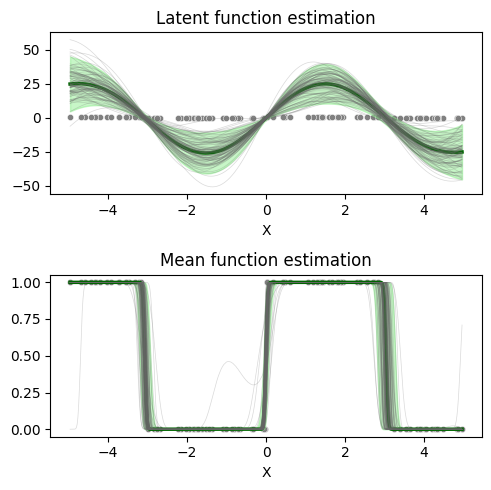

In [11]:
# Now plot the resulting model predictions
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
logistic_gp.plot_functions(data=(X, Y_binomial), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')

logistic_gp.plot_functions(data=(X, Y_binomial), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')

figs.tight_layout()
plt.show()

In [12]:
# Show LBF/deviance explained
logistic_gp.get_variance_explained(data=(X, Y_binomial.astype(float)))
logistic_gp.variance_explained

ListWrapper([66.9, 0.031])

## Negative Binomial

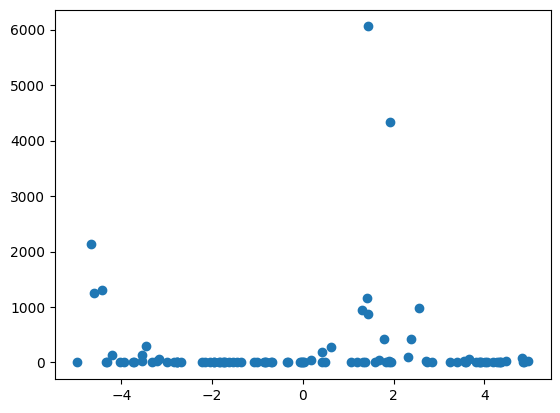

In [13]:
# Set likelihood
nb = likelihoods.NegativeBinomial(alpha=5, scale=10)

def nb_sample(nb, X, Y):
    m = nb.invlink(Y) * nb.scale
    var = m + nb.alpha * m ** 2
    p = m / var
    n = m ** 2 / (var - m)
    np.random.seed(9102)
    intensity_val = np.random.negative_binomial(
        n=n,
        p=p
    )
    return intensity_val

# Y_zinb = zinb._conditional_mean(X, Y).numpy()
# Y_zinb = likelihoods.ZeroInflatedNegativeBinomial().invlink(Y).numpy()
Y_nb = nb_sample(nb, X, Y).astype(float)
plt.scatter(X, Y_nb)

In [14]:
nb_gp = model_classes.VarGP(
    X=X,
    Y=Y_nb,
    kernel=gpflow.kernels.SquaredExponential(),
    likelihood='negativebinomial'
)
nb_gp.optimize_params(data=(X, Y_nb))

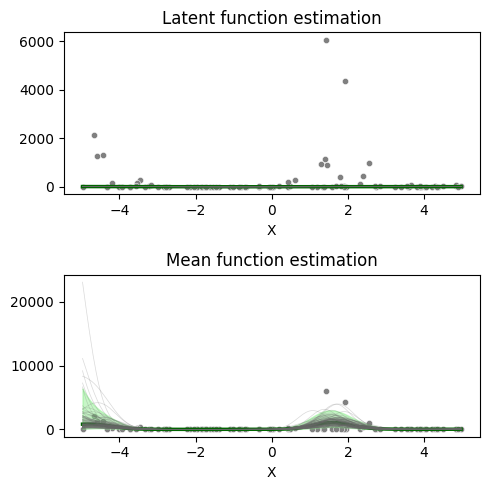

In [15]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
nb_gp.plot_functions(data=(X, Y_nb), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
nb_gp.plot_functions(data=(X, Y_nb), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

In [16]:
# Get variance/deviance explained
nb_gp.get_variance_explained(data=(X, Y_nb))
nb_gp.variance_explained

ListWrapper([43.7, 0.495])

## Inducing points

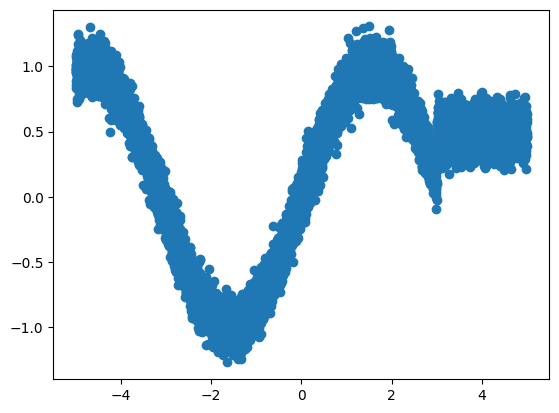

In [17]:
# Simulate some data
np.random.seed(9102)
X_big = np.random.uniform(low=-5, high=5, size=(100*N, 1))
Y_big = np.sin(X_big)
Y_big[X_big >= 3] = 0.5
Y_big += np.random.normal(scale=.1, size=(100*N, 1))
plt.scatter(X_big, Y_big)

In [18]:
sgp = model_classes.SparseGP(
    X=X_big,
    Y=Y_big,
    kernel=gpflow.kernels.SquaredExponential(),
    num_inducing_points=10,
    random_seed=9102
)
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,(),float64,0.0
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


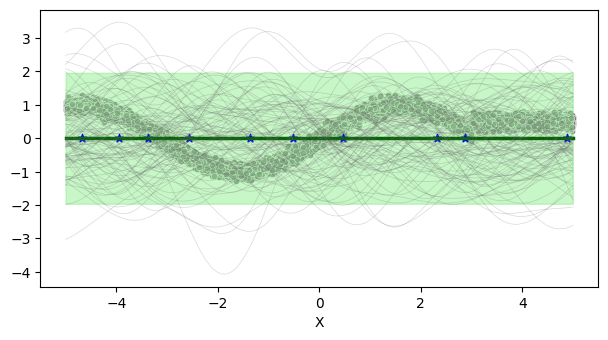

In [19]:
# Plot original points with inducing points
sgp.plot_functions(data=(X_big, Y_big), x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [20]:
sgp

name,class,transform,prior,trainable,shape,dtype,value
SparseGP.mean_function.c,Parameter,Identity,,True,(),float64,0.0
SparseGP.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
SparseGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
SparseGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0
SparseGP.inducing_variable.Z,Parameter,Identity,,True,"(10, 1)",float64,[[-2.57471...
SparseGP.q_mu,Parameter,Identity,,True,"(10, 1)",float64,[[0....
SparseGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 10, 10)",float64,"[[[1., 0., 0...."


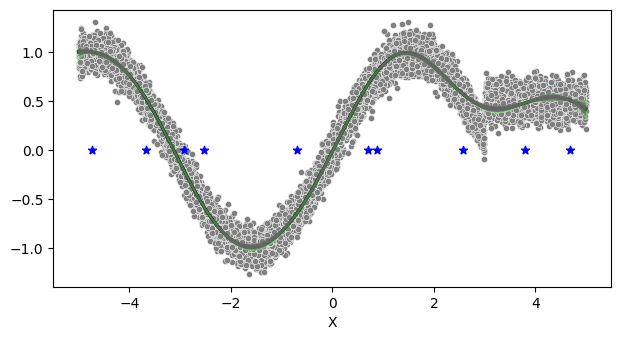

In [21]:
# Now optimize parameters (inclduing inducing points) and plot results
sgp.optimize_params(data=(X_big, Y_big))
sgp.plot_functions(data=(X_big, Y_big), x_idx=0, col_names=['X'])
plt.scatter(
    sgp.inducing_variable.Z, 
    np.zeros_like(sgp.inducing_variable.Z), 
    color='blue', 
    marker='*'
)

In [22]:
sgp.get_variance_explained(data=(X_big, Y_big))
sgp.variance_explained

ListWrapper([4860.4, 0.028])

## Penalized GP

In [23]:
pgp = model_classes.PenalizedGP(
    X=X,
    Y=Y,
    penalization_factor=1.0
)

In [24]:
pgp.optimize_params(data=(X, Y))
pgp

name,class,transform,prior,trainable,shape,dtype,value
PenalizedGP.mean_function.c,Parameter,Identity,,True,(),float64,0.5256681665466364
PenalizedGP.kernel.variance,Parameter,Softplus,Horseshoe,True,(),float64,2.06829
PenalizedGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.13707
PenalizedGP.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.010049375802604519
PenalizedGP.inducing_variable.Z,Parameter,Identity,,False,"(100, 1)",float64,[[-4.02011...
PenalizedGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[2.28448000e+00...
PenalizedGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[2.60049047e-02, 0.00000000e+00, 0.00000000e+00..."


In [25]:
# Search over penalization factors (takes longer)
# pgp.penalization_search(data=(X, Y))
# print(f'GP new penalization factor: {pgp.penalization_factor}')
# pgp

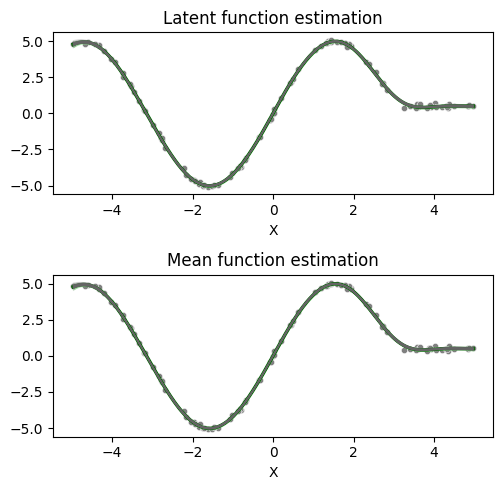

In [26]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
pgp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
pgp.plot_functions(data=(X, Y), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

In [27]:
pgp.get_variance_explained(data=(X,Y))
pgp.variance_explained

ListWrapper([50.0, 0.001])

## Putting it all together

In [28]:
Y_nb_big = nb_sample(nb, X_big, Y_big).astype(float)
psvgp = model_classes.PSVGP(
    X=X_big,
    Y=Y_nb_big,
    penalized_options={'penalization_factor': 1.0},
    sparse_options={'num_inducing_points': 100},
    variational_options={'likelihood': 'negativebinomial'}
)
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,(),float64,0.0
PSVGP.kernel.variance,Parameter,Softplus,Horseshoe,True,(),float64,1.0
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.0
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,1.0
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-2.99069...
PSVGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[0....
PSVGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[1., 0., 0...."


In [29]:
psvgp.optimize_params(data=(X_big, Y_nb_big))#, optimizer="adam")
psvgp

name,class,transform,prior,trainable,shape,dtype,value
PSVGP.mean_function.c,Parameter,Identity,,True,(),float64,1.28964
PSVGP.kernel.variance,Parameter,Softplus,Horseshoe,True,(),float64,1.11395
PSVGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1.90855
PSVGP.likelihood.alpha,Parameter,Softplus,,True,(),float64,5.09007
PSVGP.inducing_variable.Z,Parameter,Identity,,True,"(100, 1)",float64,[[-4.21815...
PSVGP.q_mu,Parameter,Identity,,False,"(100, 1)",float64,[[1.90200000e+00...
PSVGP.q_sqrt,Parameter,FillTriangular,,False,"(1, 100, 100)",float64,"[[[5.83299577e-02, 0.00000000e+00, 0.00000000e+00..."


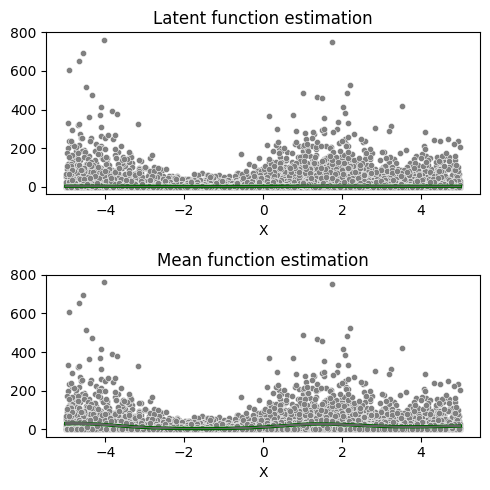

In [30]:
figs, axs = plt.subplots(2, 1, figsize=(5, 5))
psvgp.plot_functions(data=(X_big, Y_nb_big), x_idx=0, col_names=['X'], predict_type='func', ax=axs[0])
axs[0].set_title('Latent function estimation')
psvgp.plot_functions(data=(X_big, Y_nb_big), x_idx=0, col_names=['X'], predict_type='mean', ax=axs[1])
axs[1].set_title('Mean function estimation')
figs.tight_layout()
plt.show()

In [31]:
psvgp.get_variance_explained(data=(X_big,Y_nb_big))
psvgp.variance_explained

ListWrapper([341.1, 0.934])

## GP Search Class

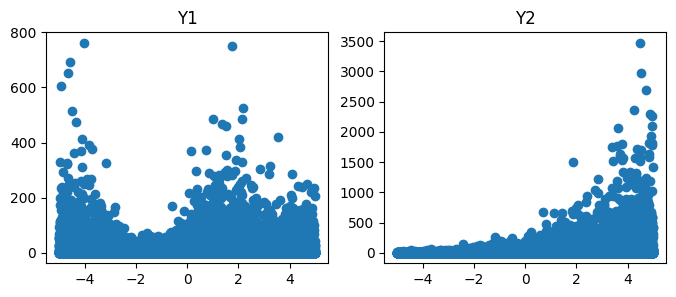

In [32]:
pd_X = pd.DataFrame(
    data=X_big,
    columns=['X']
)
pd_Y = pd.DataFrame(
    data=Y_nb_big,
    columns=['Y1']
)
pd_Y['Y2'] = nb_sample(nb, pd_X['X'], 0.5*pd_X['X'] + 0.5).astype(float)

figs, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(pd_X, pd_Y['Y1'])
axs[0].set_title('Y1')
axs[1].scatter(pd_X, pd_Y['Y2'])
axs[1].set_title('Y2')

gps = model_search.GPSearch(
    X=pd_X,
    Y=pd_Y,
    outcome_likelihood='negativebinomial',
    Y_transform=None
)

In [33]:
gps.penalized_optimization(random_seed=9102)

Building 2 models...


(pid=24504)  0:   0%|          | 0.00/2.00 [00:00<?, ?it/s]

Finished 2 models (100%), elapsed time: 2.1 minutes


In [34]:
gps.models["Y2"].kernel_name

'squared_exponential[0]'

/Users/allen/miniforge3/envs/waveome/lib/python3.11/site-packages/seaborn/matrix.py:1113: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(**tight_params)


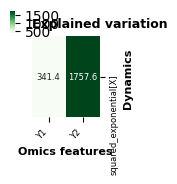

In [35]:
gps.plot_heatmap(var_cutoff=0, cluster=False)

<Axes: xlabel='X'>

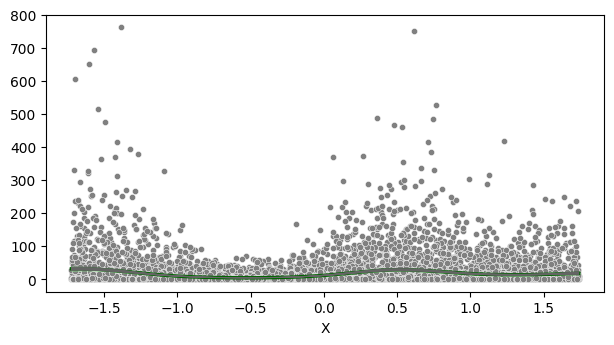

In [36]:
gps.plot_marginal(out_label="Y1", x_axis_label="X")

(<Figure size 720x144 with 2 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X](341.4)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (93.4%)'}, xlabel='fitted value', ylabel='pearson residual'>,
         <Axes: >, <Axes: >]], dtype=object))

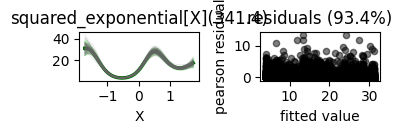

In [37]:
gps.plot_parts(out_label='Y1', x_axis_label='X')#, conf_level_val=0.1)

(<Figure size 720x144 with 2 Axes>,
 array([[<Axes: title={'center': 'squared_exponential[X](1757.6)'}, xlabel='X'>,
         <Axes: title={'center': 'residuals (73.5%)'}, xlabel='fitted value', ylabel='pearson residual'>,
         <Axes: >, <Axes: >]], dtype=object))

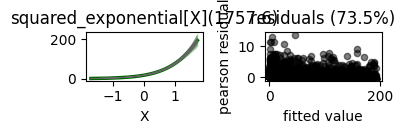

In [38]:
gps.plot_parts(out_label='Y2', x_axis_label='X')#, conf_level_val=0)

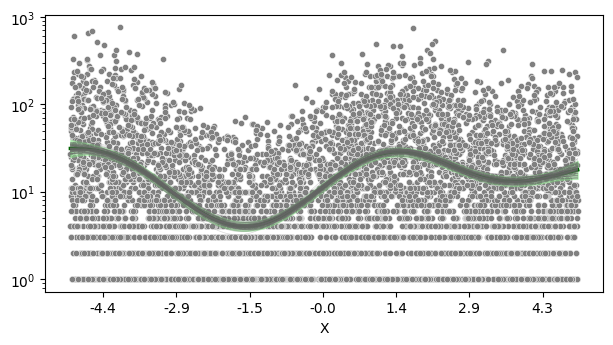

In [39]:
gps.plot_marginal(out_label="Y1", x_axis_label="X", reverse_transform_axes=True)
plt.yscale("log")
plt.show()

## Account for multiple time-specific effects

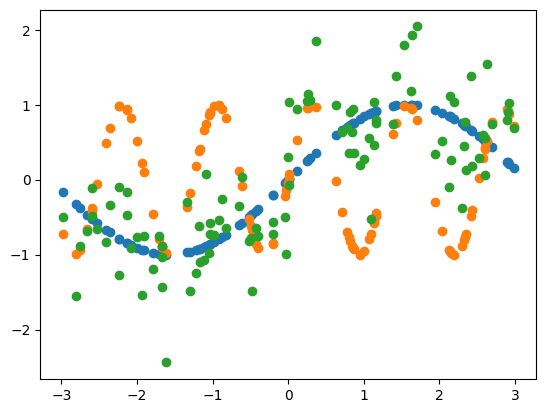

In [40]:
# Multiple time components with different lengthscales
# Libraries
import gpflow
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from waveome import (
    model_classes,
    kernels,
    model_search,
    likelihoods,
    utilities
)


np.random.seed(9102)
n = 100
x_time = np.random.uniform(low=-3, high=3, size=n)
y_time = np.sin(x_time) 
y_time2 = np.sin(5*x_time)
y_time_out = y_time + 0.5*y_time2 + np.random.normal(scale=0.5, size=n)

plt.scatter(x_time, y_time)
plt.scatter(x_time, y_time2)
plt.scatter(x_time, y_time_out)
plt.show()

In [ ]:
# Show kernel penalization with different kernel types and multiple restarts
gps_time = model_search.GPSearch(
    X=pd.DataFrame({
        "time": x_time,
    }),
    Y=pd.DataFrame({
        "y_mixed": y_time_out
    }),
    outcome_likelihood="gaussian",
)

gps_time.penalized_optimization(
    penalization_factor=1.0,
    num_restart=5,
    kernel_options={"kerns": [
        gpflow.kernels.SquaredExponential(),
        gpflow.kernels.Periodic(base_kernel=gpflow.kernels.SquaredExponential())
    ]}
)

Building 1 models...


(pid=24995)  0:   0%|          | 0.00/1.00 [00:00<?, ?it/s]

Finished 1 models (100%), elapsed time: 0.5 minutes


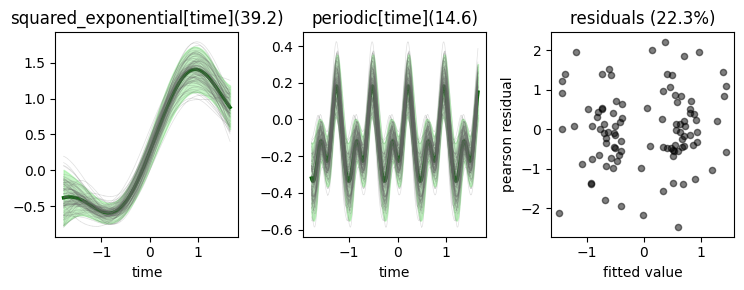

In [ ]:
# Plot model components
gps_time.plot_parts(out_label="y_mixed", x_axis_label="time", figsize=(10, 3))
plt.show()

<Axes: xlabel='time'>

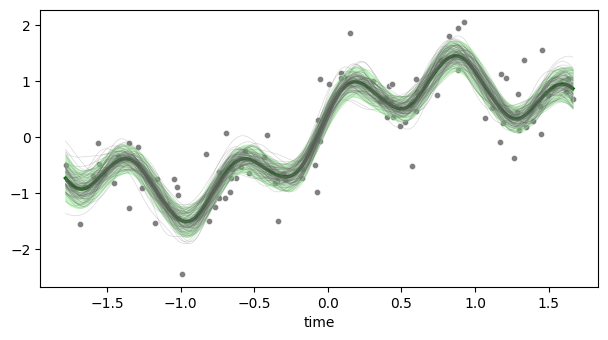

In [ ]:
# Show commbined marginal plot with complicated relationship
gps_time.plot_marginal(out_label="y_mixed", x_axis_label="time")